In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 39.0 MB/s eta 0:00:00


Importing libraries

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_percentage_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)
from statsmodels.tsa.seasonal import seasonal_decompose

Restaurants data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/TSA_BDA_2024/Lab11/RestaurantVisitors.csv', index_col='date',parse_dates=True)

In [ ]:
df

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65.0,25.0,67.0,139.0,296.0
2016-01-02,Saturday,0,na,24.0,39.0,43.0,85.0,191.0
2016-01-03,Sunday,0,na,24.0,31.0,66.0,81.0,202.0
2016-01-04,Monday,0,na,23.0,18.0,32.0,32.0,105.0
2016-01-05,Tuesday,0,na,2.0,15.0,38.0,43.0,98.0
...,...,...,...,...,...,...,...,...
2017-05-27,Saturday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-28,Sunday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-29,Monday,1,Memorial Day,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.index.freq = 'D'
df1 = df.dropna()
df1.tail()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-04-18,Tuesday,0,na,30.0,30.0,13.0,18.0,91.0
2017-04-19,Wednesday,0,na,20.0,11.0,30.0,18.0,79.0
2017-04-20,Thursday,0,na,22.0,3.0,19.0,46.0,90.0
2017-04-21,Friday,0,na,38.0,53.0,36.0,38.0,165.0
2017-04-22,Saturday,0,na,97.0,20.0,50.0,59.0,226.0


In [ ]:
cols=['rest1','rest2','rest3','rest4','total']
for col in cols:
 df1[col]=df1[col].astype(int)

<ipython-input-7-015192da4e31>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col]=df1[col].astype(int)
<ipython-input-7-015192da4e31>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col]=df1[col].astype(int)
<ipython-input-7-015192da4e31>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 478 entries, 2016-01-01 to 2017-04-22
Freq: D
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   weekday       478 non-null    object
 1   holiday       478 non-null    int64 
 2   holiday_name  478 non-null    object
 3   rest1         478 non-null    int64 
 4   rest2         478 non-null    int64 
 5   rest3         478 non-null    int64 
 6   rest4         478 non-null    int64 
 7   total         478 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 33.6+ KB


Time series restaurant 1

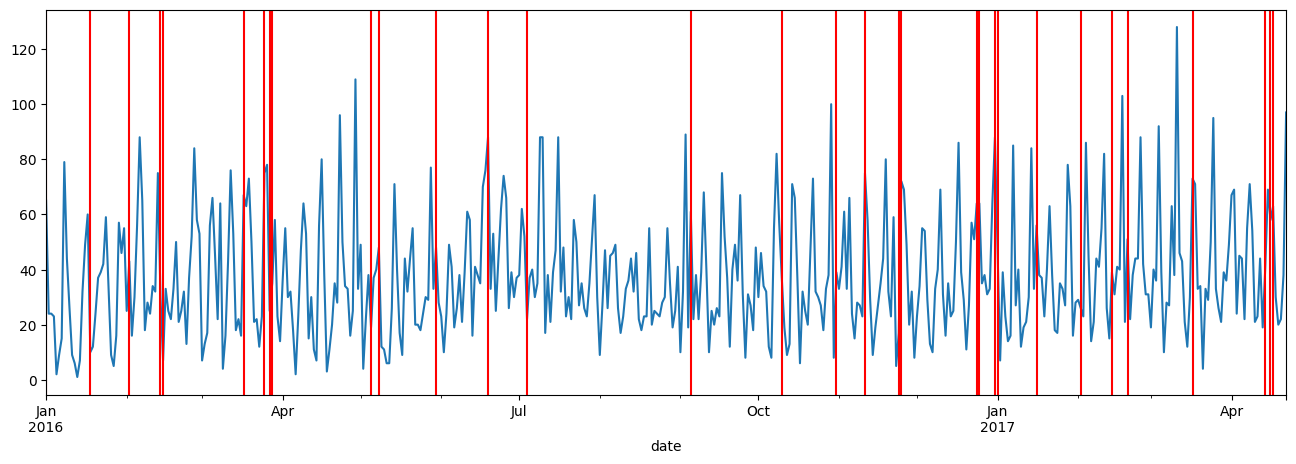

In [ ]:
ax=df1['rest1'].plot(figsize=(16,5))
for x in df1.query('holiday==1').index:
 ax.axvline(x=x,color='r')

Time series restaurant 2

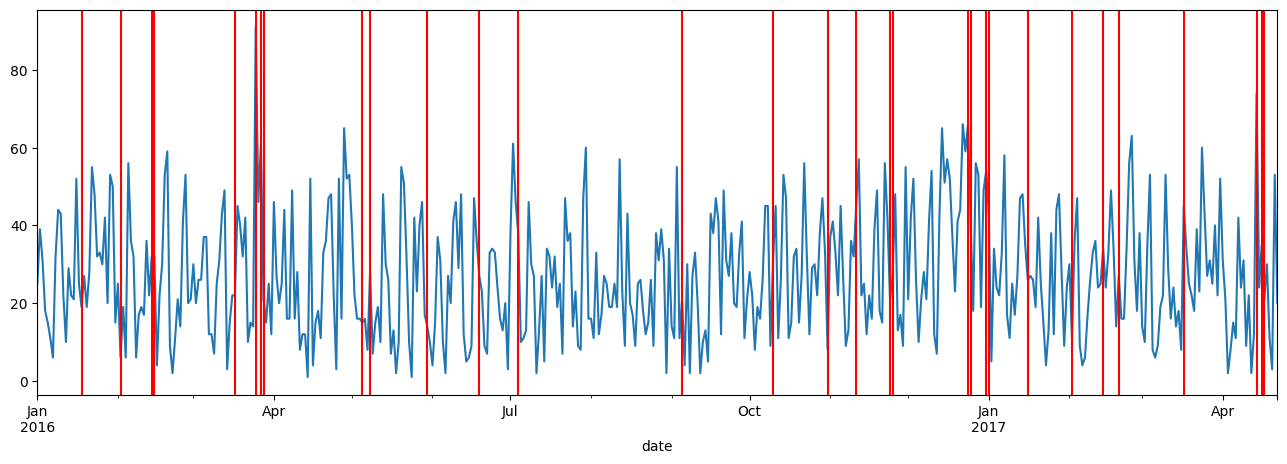

In [ ]:
ax=df1['rest2'].plot(figsize=(16,5))
for x in df1.query('holiday==1').index:
 ax.axvline(x=x,color='r')

Time series restaurant 3

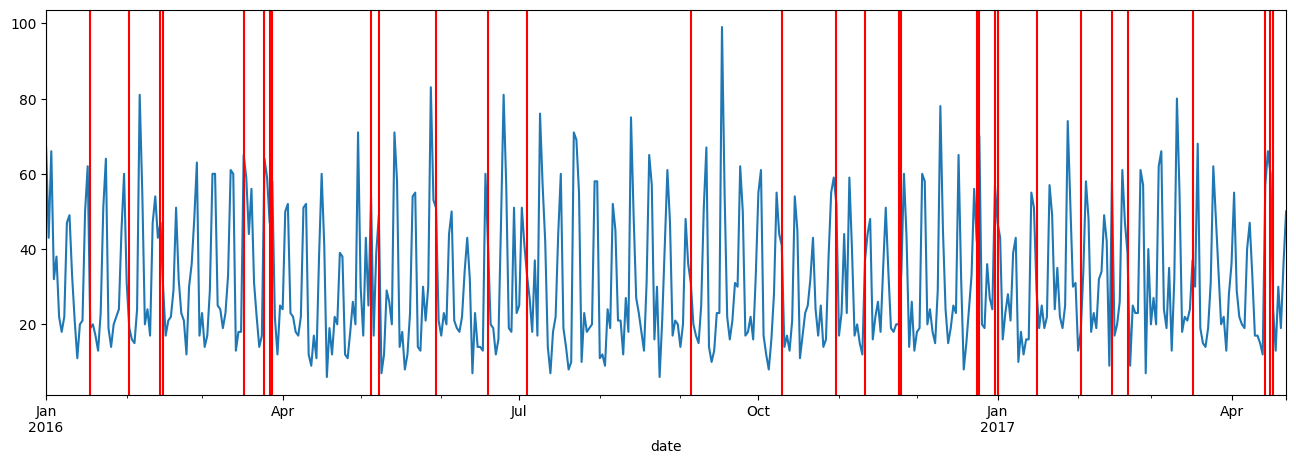

In [ ]:
ax=df1['rest3'].plot(figsize=(16,5))
for x in df1.query('holiday==1').index:
 ax.axvline(x=x,color='r')

Time series restaurant 4

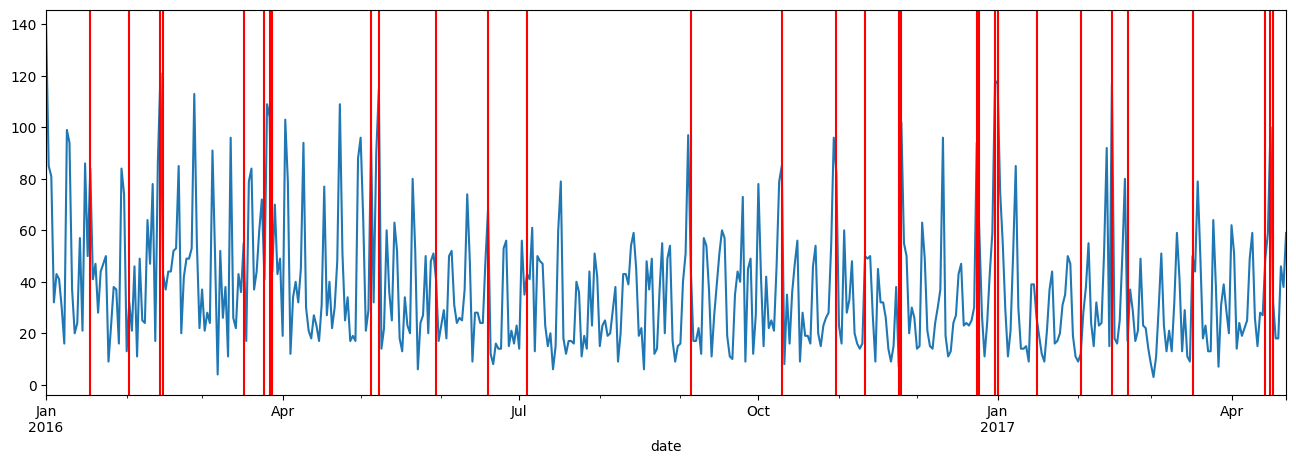

In [ ]:
ax=df1['rest4'].plot(figsize=(16,5))
for x in df1.query('holiday==1').index:
 ax.axvline(x=x,color='r')

Plots for restaurant 1

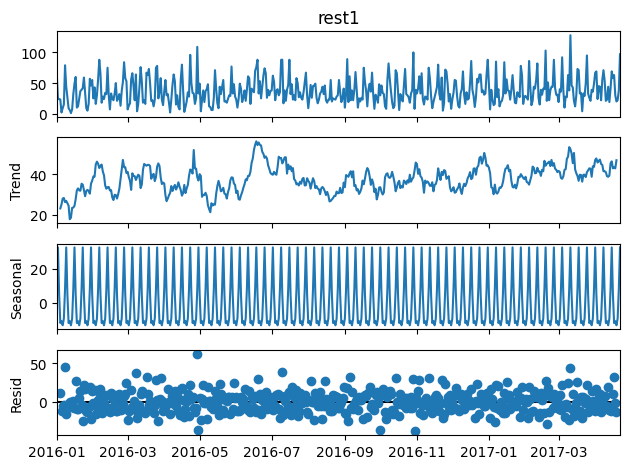

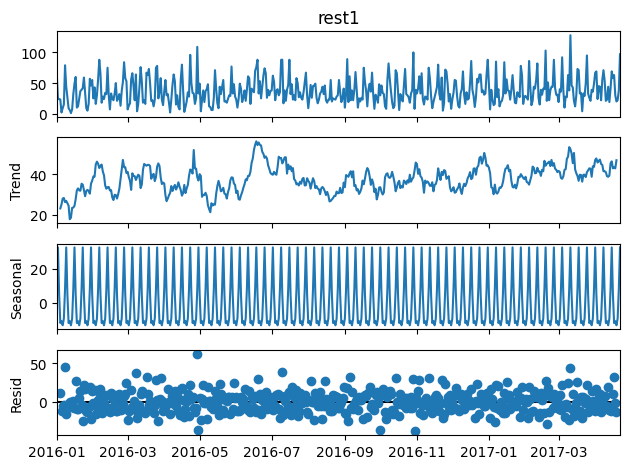

In [ ]:
result_rest1=seasonal_decompose(df1['rest1'])
result_rest1.plot()

Plots for restaurant 2 time series

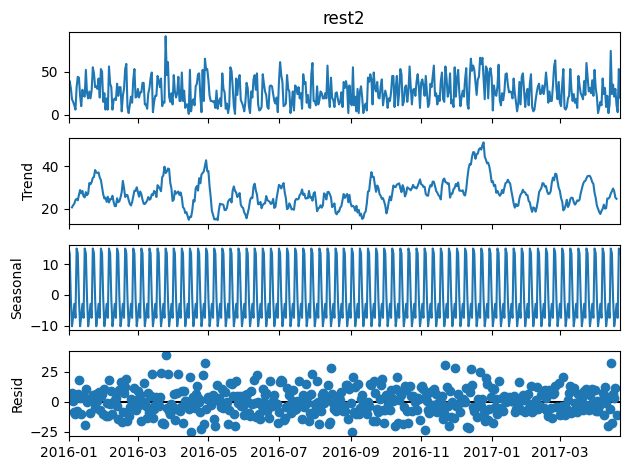

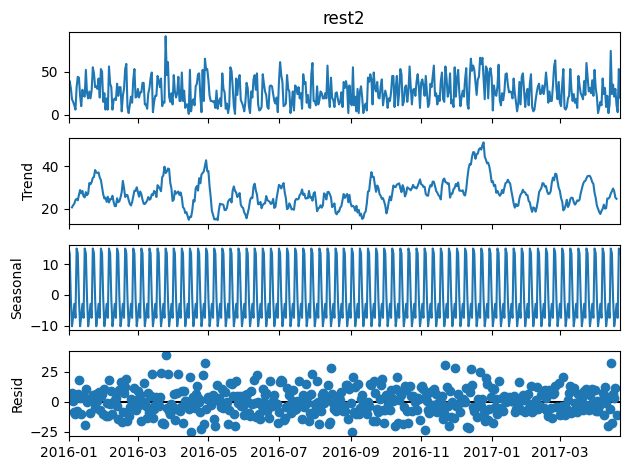

In [ ]:
result_rest2=seasonal_decompose(df1['rest2'])
result_rest2.plot()

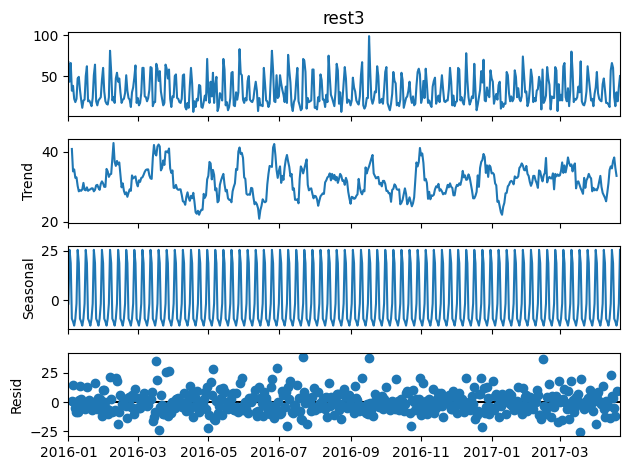

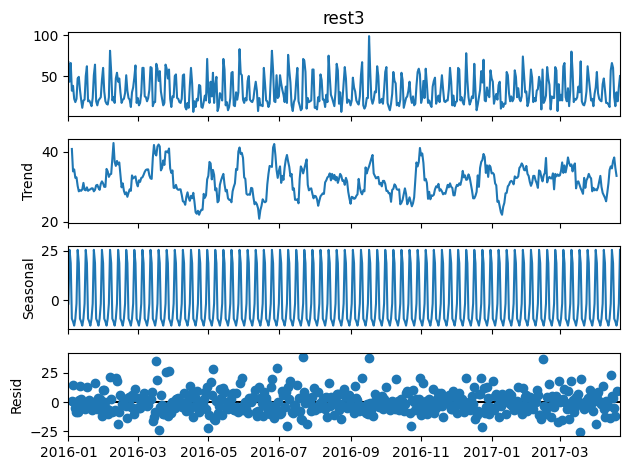

In [ ]:
result_rest3=seasonal_decompose(df1['rest3'])
result_rest3.plot()

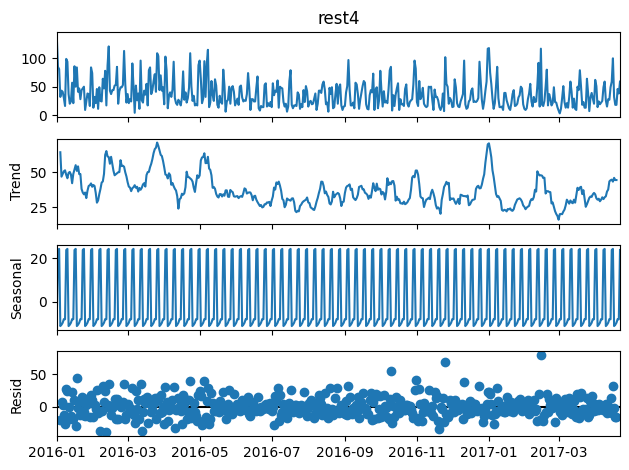

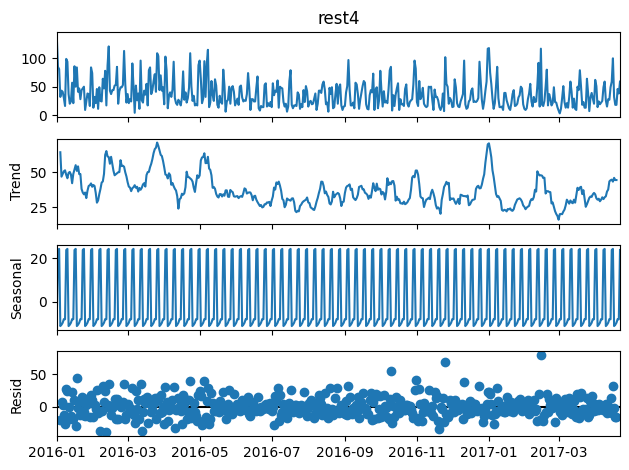

In [ ]:
result_rest4=seasonal_decompose(df1['rest4'])
result_rest4.plot()

using auto_arima for automatically selecting the optimal ARIMA model parameters
for all 4 time series separately

In [ ]:
auto_arima(df1['rest1'], exogenous = df1['holiday'], start_p =0 , start_q= 0, max_p =5, max_q = 5 , stepwise=True, seasonal=True,m=7,trace=True).summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[7] intercept   : AIC=4288.103, Time=1.59 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=4498.869, Time=0.06 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=4282.164, Time=0.78 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=inf, Time=1.99 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=4496.872, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=4459.994, Time=0.14 sec
 ARIMA(1,1,0)(2,0,0)[7] intercept   : AIC=4233.491, Time=0.94 sec
 ARIMA(1,1,0)(2,0,1)[7] intercept   : AIC=inf, Time=1.84 sec
 ARIMA(1,1,0)(1,0,1)[7] intercept   : AIC=4124.750, Time=2.03 sec
 ARIMA(1,1,0)(0,0,1)[7] intercept   : AIC=4354.529, Time=0.42 sec
 ARIMA(1,1,0)(1,0,2)[7] intercept   : AIC=inf, Time=2.23 sec
 ARIMA(1,1,0)(0,0,2)[7] intercept   : AIC=4324.385, Time=1.28 sec
 ARIMA(1,1,0)(2,0,2)[7] intercept   : AIC=inf, Time=9.52 sec
 ARIMA(2,1,0)(1,0,1)[7] intercept   : AIC=inf, Time=4.30 sec
 ARIMA(1,1,1)(1,0,1)[7] intercept   : AIC=3961.998, Time=3

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  478
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 7)   Log Likelihood               -1974.999
Date:                           Wed, 15 May 2024   AIC                           3961.998
Time:                                   11:43:42   BIC                           3987.003
Sample:                               01-01-2016   HQIC                          3971.829
                                    - 04-22-2017                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   5.752e-05      0.000      0.203      0.839      -0.000       0.001
ar.L1         -0.0243      0.046     -0.523      0.601      -0.115       0.067
ma.L1         -0.9839      0.009   -107.063      0.000      -1.002      -0.966
ar.S.L7        0.9981      0.002    596.498      0.000       0.995       1.001
ma.S.L7       -0.9303      0.023    -39.780      0.000      -0.976      -0.884
sigma2       222.6720     14.239     15.638      0.000     194.764     250.580
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                21.29
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               0.74   Skew:                             0.50
Prob(H) (two-sided):                  0.06   Kurtosis:                         3.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
auto_arima(df1['rest2'], exogenous = df1['holiday'], start_p =0 , start_q= 0, max_p =5, max_q = 5 , stepwise=True, seasonal=True,m=7,trace=True).summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,1)[7] intercept   : AIC=3796.678, Time=2.25 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=3993.941, Time=0.07 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=3879.592, Time=1.42 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=3913.211, Time=1.08 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=4653.097, Time=0.05 sec
 ARIMA(0,0,0)(0,0,1)[7] intercept   : AIC=3927.769, Time=0.68 sec
 ARIMA(0,0,0)(1,0,0)[7] intercept   : AIC=3891.413, Time=0.89 sec
 ARIMA(0,0,0)(2,0,1)[7] intercept   : AIC=3816.916, Time=2.68 sec
 ARIMA(0,0,0)(1,0,2)[7] intercept   : AIC=3806.983, Time=2.48 sec
 ARIMA(0,0,0)(0,0,2)[7] intercept   : AIC=3904.015, Time=0.49 sec
 ARIMA(0,0,0)(2,0,0)[7] intercept   : AIC=3858.705, Time=1.03 sec
 ARIMA(0,0,0)(2,0,2)[7] intercept   : AIC=inf, Time=1.49 sec
 ARIMA(1,0,0)(1,0,1)[7] intercept   : AIC=3789.098, Time=1.59 sec
 ARIMA(1,0,0)(0,0,1)[7] intercept   : AIC=3913.497, Time=0.44 sec
 ARIMA(1,0,0)(2,0,1)[7] intercept   : 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  478
Model:             SARIMAX(2, 0, 0)x(1, 0, [1], 7)   Log Likelihood               -1887.101
Date:                             Wed, 15 May 2024   AIC                           3786.202
Time:                                     11:44:54   BIC                           3811.220
Sample:                                 01-01-2016   HQIC                          3796.038
                                      - 04-22-2017                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.6968      0.343      2.031      0.042       0.025       1.369
ar.L1          0.1320      0.047      2.825      0.005       0.040       0.224
ar.L2          0.1037      0.040      2.562      0.010       0.024       0.183
ar.S.L7        0.9626      0.015     62.290      0.000       0.932       0.993
ma.S.L7       -0.7804      0.042    -18.365      0.000      -0.864      -0.697
sigma2       151.0947      8.986     16.814      0.000     133.482     168.707
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                31.33
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               0.78   Skew:                             0.56
Prob(H) (two-sided):                  0.11   Kurtosis:                         3.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
auto_arima(df1['rest3'], exogenous = df1['holiday'], start_p =0 , start_q= 0, max_p =5, max_q = 5 , stepwise=True, seasonal=True,m=7,trace=True).summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,1)[7] intercept   : AIC=3654.398, Time=1.38 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=4113.097, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=3865.463, Time=1.84 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=3963.602, Time=0.51 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=4790.278, Time=0.02 sec
 ARIMA(0,0,0)(0,0,1)[7] intercept   : AIC=3984.802, Time=0.29 sec
 ARIMA(0,0,0)(1,0,0)[7] intercept   : AIC=3864.802, Time=0.48 sec
 ARIMA(0,0,0)(2,0,1)[7] intercept   : AIC=3822.189, Time=3.01 sec
 ARIMA(0,0,0)(1,0,2)[7] intercept   : AIC=3703.219, Time=3.38 sec
 ARIMA(0,0,0)(0,0,2)[7] intercept   : AIC=3906.933, Time=3.22 sec
 ARIMA(0,0,0)(2,0,0)[7] intercept   : AIC=3781.022, Time=5.11 sec
 ARIMA(0,0,0)(2,0,2)[7] intercept   : AIC=3909.204, Time=12.28 sec
 ARIMA(1,0,0)(1,0,1)[7] intercept   : AIC=3674.265, Time=3.37 sec
 ARIMA(0,0,1)(1,0,1)[7] intercept   : AIC=3676.310, Time=3.75 sec
 ARIMA(1,0,1)(1,0,1)[7] intercep

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:                         y   No. Observations:                  478
Model:             SARIMAX(1, 0, [1], 7)   Log Likelihood               -1823.199
Date:                   Wed, 15 May 2024   AIC                           3654.398
Time:                           11:45:36   BIC                           3671.076
Sample:                       01-01-2016   HQIC                          3660.955
                            - 04-22-2017                                         
Covariance Type:                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1148      0.103      1.118      0.264      -0.087       0.316
ar.S.L7        0.9963      0.003    316.533      0.000       0.990       1.002
ma.S.L7       -0.9240      0.029    -31.713      0.000      -0.981      -0.867
sigma2       117.9847      6.087     19.385      0.000     106.055     129.914
===================================================================================
Ljung-Box (L1) (Q):                   1.12   Jarque-Bera (JB):               156.85
Prob(Q):                              0.29   Prob(JB):                         0.00
Heteroskedasticity (H):               0.67   Skew:                             1.05
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
auto_arima(df1['rest4'], exogenous = df1['holiday'], start_p =0 , start_q= 0, max_p =5, max_q = 5 , stepwise=True, seasonal=True,m=7,trace=True).summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[7] intercept   : AIC=4386.707, Time=1.25 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=4585.754, Time=0.10 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=4430.846, Time=0.72 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=4340.249, Time=1.23 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=4583.769, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=4399.114, Time=0.53 sec
 ARIMA(0,1,1)(1,0,1)[7] intercept   : AIC=inf, Time=3.35 sec
 ARIMA(0,1,1)(0,0,2)[7] intercept   : AIC=inf, Time=1.11 sec
 ARIMA(0,1,1)(1,0,0)[7] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(0,1,1)(1,0,2)[7] intercept   : AIC=4178.177, Time=2.47 sec
 ARIMA(0,1,1)(2,0,2)[7] intercept   : AIC=inf, Time=4.79 sec
 ARIMA(0,1,1)(2,0,1)[7] intercept   : AIC=inf, Time=6.38 sec
 ARIMA(0,1,0)(1,0,2)[7] intercept   : AIC=4384.934, Time=1.45 sec
 ARIMA(1,1,1)(1,0,2)[7] intercept   : AIC=inf, Time=3.44 sec
 ARIMA(0,1,2)(1,0,2)[7] intercept   : AIC=4174.637, Time=3.30 s

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  478
Model:             SARIMAX(0, 1, 4)x(1, 0, [1], 7)   Log Likelihood               -2075.282
Date:                             Wed, 15 May 2024   AIC                           4164.564
Time:                                     11:49:03   BIC                           4193.736
Sample:                                 01-01-2016   HQIC                          4176.034
                                      - 04-22-2017                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8280      0.040    -20.793      0.000      -0.906      -0.750
ma.L2         -0.0316      0.055     -0.571      0.568      -0.140       0.077
ma.L3         -0.0402      0.058     -0.693      0.488      -0.154       0.073
ma.L4         -0.0841      0.045     -1.875      0.061      -0.172       0.004
ar.S.L7        0.9968      0.002    407.237      0.000       0.992       1.002
ma.S.L7       -0.9281      0.024    -38.457      0.000      -0.975      -0.881
sigma2       341.1262     15.838     21.538      0.000     310.084     372.168
===================================================================================
Ljung-Box (L1) (Q):                   0.24   Jarque-Bera (JB):               204.96
Prob(Q):                              0.62   Prob(JB):                         0.00
Heteroskedasticity (H):               0.72   Skew:                             0.93
Prob(H) (two-sided):                  0.04   Kurtosis:                         5.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""



1.   for rest1 we have SARIMAX (1,1,1 x 1 ,0,1,7)
2.   for rest2 we have SARIMAX (2,0,0 x 1 ,0,1,7)
3.   for rest3 we have SARIMAX (0,0,0 x 1 ,0,1,7)
4.   for rest3 we have SARIMAX (0,1,4 x 1 ,0,1,7)



In [ ]:
train=df1.iloc[:-12]
test=df1.iloc[-12:]

Fitting data to all models for respective time series

In [ ]:
model_rest1=SARIMAX(train['rest1'],order=(1,1,1),seasonal_order=(1,0,1,7), exog = train['holiday']).fit()
model_rest1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                             rest1   No. Observations:                  466
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 7)   Log Likelihood               -1913.993
Date:                           Wed, 15 May 2024   AIC                           3839.986
Time:                                   12:07:45   BIC                           3864.839
Sample:                               01-01-2016   HQIC                          3849.768
                                    - 04-10-2017                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
holiday       13.1820      2.251      5.856      0.000       8.770      17.594
ar.L1         -0.0018      0.044     -0.041      0.967      -0.088       0.084
ma.L1         -0.9970      0.003   -349.897      0.000      -1.003      -0.991
ar.S.L7        0.9980      0.002    571.676      0.000       0.995       1.001
ma.S.L7       -0.9232      0.024    -38.108      0.000      -0.971      -0.876
sigma2       211.5058     12.884     16.416      0.000     186.254     236.758
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                19.54
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.67   Skew:                             0.43
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

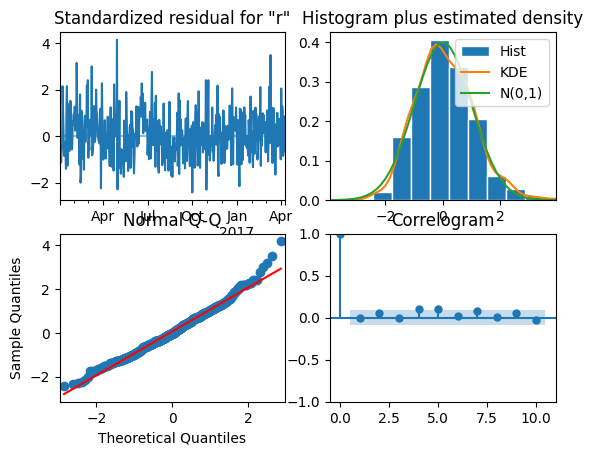

In [ ]:
model_rest1.plot_diagnostics();

In [ ]:
start=len(train)
end=start+len(test)-1
predictions_rest1=model_rest1.predict(start=start,end=end,dynamic=False, exog=test['holiday']).rename('SARImax(1,1,1)x (1, 0, 1, 7)')

In [ ]:
model_rest2=SARIMAX(train['rest2'],order=(2,0,0),seasonal_order=(1,0,1,7), exog=train['holiday']).fit()
model_rest2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               rest2   No. Observations:                  466
Model:             SARIMAX(2, 0, 0)x(1, 0, [1], 7)   Log Likelihood               -1837.479
Date:                             Wed, 15 May 2024   AIC                           3686.958
Time:                                     12:10:41   BIC                           3711.823
Sample:                                 01-01-2016   HQIC                          3696.744
                                      - 04-10-2017                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
holiday        6.1697      2.170      2.843      0.004       1.916      10.423
ar.L1          0.1591      0.048      3.330      0.001       0.065       0.253
ar.L2          0.1306      0.043      3.010      0.003       0.046       0.216
ar.S.L7        0.9977      0.002    517.649      0.000       0.994       1.001
ma.S.L7       -0.8794      0.026    -33.436      0.000      -0.931      -0.828
sigma2       149.6457      8.956     16.709      0.000     132.093     167.199
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):                24.88
Prob(Q):                              0.72   Prob(JB):                         0.00
Heteroskedasticity (H):               0.76   Skew:                             0.49
Prob(H) (two-sided):                  0.09   Kurtosis:                         3.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

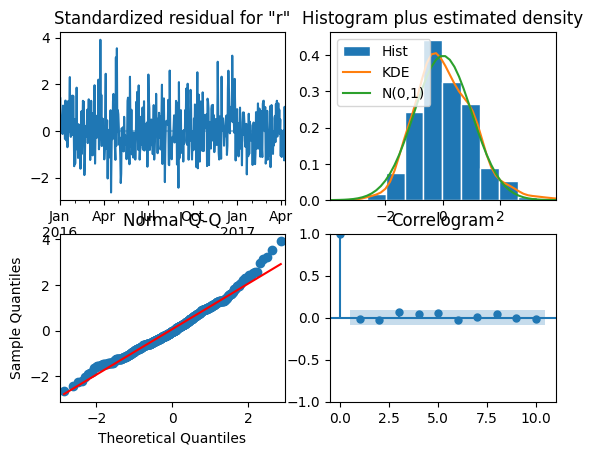

In [ ]:
model_rest2.plot_diagnostics();

In [ ]:
start=len(train)
end=start+len(test)-1
predictions_rest2=model_rest2.predict(start=start,end=end,dynamic=False, exog=test['holiday']).rename('SARImax(2,0,0)x (1, 0, 1, 7)')

In [ ]:
model_rest3=SARIMAX(train['rest3'],order=(0,0,0),seasonal_order=(1,0,1,7), exog=train['holiday']).fit()
model_rest3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:                     rest3   No. Observations:                  466
Model:             SARIMAX(1, 0, [1], 7)   Log Likelihood               -1758.135
Date:                   Wed, 15 May 2024   AIC                           3524.270
Time:                           12:11:03   BIC                           3540.846
Sample:                       01-01-2016   HQIC                          3530.794
                            - 04-10-2017                                         
Covariance Type:                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
holiday       13.0672      1.252     10.438      0.000      10.614      15.521
ar.S.L7        1.0000   5.78e-05   1.73e+04      0.000       1.000       1.000
ma.S.L7       -0.9950      0.130     -7.642      0.000      -1.250      -0.740
sigma2       101.0527     13.127      7.698      0.000      75.325     126.781
===================================================================================
Ljung-Box (L1) (Q):                   1.54   Jarque-Bera (JB):                97.42
Prob(Q):                              0.21   Prob(JB):                         0.00
Heteroskedasticity (H):               0.78   Skew:                             0.73
Prob(H) (two-sided):                  0.12   Kurtosis:                         4.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

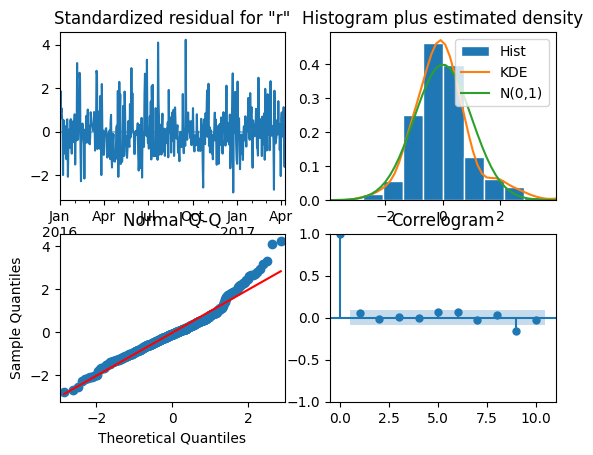

In [ ]:
model_rest3.plot_diagnostics();

In [ ]:
start=len(train)
end=start+len(test)-1
predictions_rest3=model_rest3.predict(start=start,end=end,dynamic=False, exog=test['holiday']).rename('SARImax(0,0,0)x (1, 0, 1, 7)')

In [ ]:
model_rest4=SARIMAX(train['rest4'],order=(0,1,4),seasonal_order=(1,0,1,7), exog=train['holiday']).fit()
model_rest4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               rest4   No. Observations:                  466
Model:             SARIMAX(0, 1, 4)x(1, 0, [1], 7)   Log Likelihood               -1975.672
Date:                             Wed, 15 May 2024   AIC                           3967.345
Time:                                     12:11:49   BIC                           4000.481
Sample:                                 01-01-2016   HQIC                          3980.387
                                      - 04-10-2017                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
holiday       33.2224      1.976     16.812      0.000      29.349      37.095
ma.L1         -0.8844      0.041    -21.668      0.000      -0.964      -0.804
ma.L2         -0.0140      0.062     -0.224      0.823      -0.136       0.108
ma.L3         -0.0309      0.072     -0.427      0.670      -0.173       0.111
ma.L4         -0.0608      0.050     -1.208      0.227      -0.159       0.038
ar.S.L7        0.9965      0.003    382.985      0.000       0.991       1.002
ma.S.L7       -0.9126      0.027    -34.360      0.000      -0.965      -0.861
sigma2       277.6064     16.217     17.118      0.000     245.821     309.392
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                26.47
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               0.73   Skew:                             0.38
Prob(H) (two-sided):                  0.05   Kurtosis:                         3.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

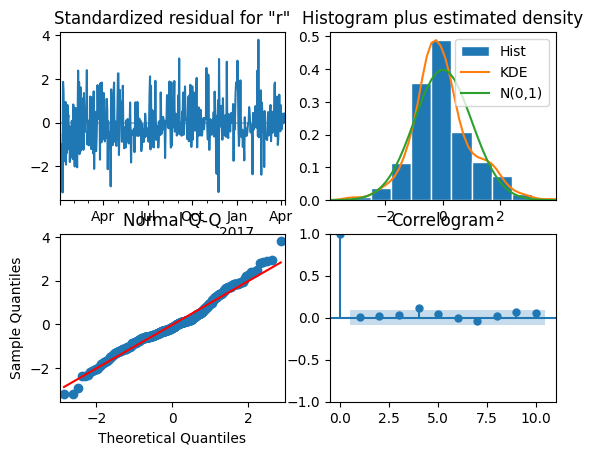

In [ ]:
model_rest4.plot_diagnostics();

In [ ]:
start=len(train)
end=start+len(test)-1
predictions_rest4=model_rest4.predict(start=start,end=end,dynamic=False, exog=test['holiday']).rename('SARImax(0,1,4)x (1, 0, 1, 7)')

Aggregating predictions from all models to see total customers from all 4 restaurants

In [ ]:
predictions_total = predictions_rest1 + predictions_rest2 + predictions_rest3 +predictions_rest4
predictions_total

2017-04-11     92.898621
2017-04-12     95.859431
2017-04-13     91.086233
2017-04-14    207.037557
2017-04-15    223.126629
2017-04-16    232.531090
2017-04-17    146.131602
2017-04-18     91.431586
2017-04-19     95.575462
2017-04-20     90.745328
2017-04-21    141.361139
2017-04-22    222.868314
Freq: D, dtype: float64

Compariosn of "total" actual customers vs separately predcted

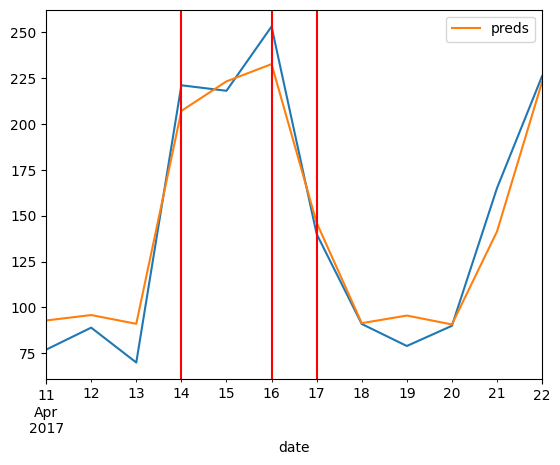

In [ ]:
ax=test['total'].plot()
predictions_total.plot(legend=True, label="preds")
for x in test.query('holiday==1').index:
 ax.axvline(x=x,color='r')

In [ ]:
mean_absolute_percentage_error(test['total'],predictions_total)*100

9.801164725409066

The mean abs pecent error is significantly lower than the model predictions made directly on the "total" customers time series in the lecture ( 18.7)

### Regression
on the "total" cusotmers time series using 7 days + holidays + weekdays as features

In [ ]:
df1

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65,25,67,139,296
2016-01-02,Saturday,0,na,24,39,43,85,191
2016-01-03,Sunday,0,na,24,31,66,81,202
2016-01-04,Monday,0,na,23,18,32,32,105
2016-01-05,Tuesday,0,na,2,15,38,43,98
...,...,...,...,...,...,...,...,...
2017-04-18,Tuesday,0,na,30,30,13,18,91
2017-04-19,Wednesday,0,na,20,11,30,18,79
2017-04-20,Thursday,0,na,22,3,19,46,90


In [ ]:
data_reg = df1.copy()

In [ ]:
data_reg

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65,25,67,139,296
2016-01-02,Saturday,0,na,24,39,43,85,191
2016-01-03,Sunday,0,na,24,31,66,81,202
2016-01-04,Monday,0,na,23,18,32,32,105
2016-01-05,Tuesday,0,na,2,15,38,43,98
...,...,...,...,...,...,...,...,...
2017-04-18,Tuesday,0,na,30,30,13,18,91
2017-04-19,Wednesday,0,na,20,11,30,18,79
2017-04-20,Thursday,0,na,22,3,19,46,90


In [ ]:
data_reg['total'].shift(0)

date
2016-01-01    296
2016-01-02    191
2016-01-03    202
2016-01-04    105
2016-01-05     98
             ... 
2017-04-18     91
2017-04-19     79
2017-04-20     90
2017-04-21    165
2017-04-22    226
Freq: D, Name: total, Length: 478, dtype: int64

In [ ]:
for i in range(7,0,-1):
    print(i)
    data_reg['t= ' + str(i)] =df1['total'].shift(i)

7
6
5
4
3
2
1


In [ ]:
data_reg

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total,t= 7,t= 6,t= 5,t= 4,t= 3,t= 2,t= 1
date,,,,,,,,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65,25,67,139,296,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-02,Saturday,0,na,24,39,43,85,191,NaN,NaN,NaN,NaN,NaN,NaN,296.0
2016-01-03,Sunday,0,na,24,31,66,81,202,NaN,NaN,NaN,NaN,NaN,296.0,191.0
2016-01-04,Monday,0,na,23,18,32,32,105,NaN,NaN,NaN,NaN,296.0,191.0,202.0
2016-01-05,Tuesday,0,na,2,15,38,43,98,NaN,NaN,NaN,296.0,191.0,202.0,105.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-04-18,Tuesday,0,na,30,30,13,18,91,77.0,89.0,70.0,221.0,218.0,253.0,140.0
2017-04-19,Wednesday,0,na,20,11,30,18,79,89.0,70.0,221.0,218.0,253.0,140.0,91.0
2017-04-20,Thursday,0,na,22,3,19,46,90,70.0,221.0,218.0,253.0,140.0,91.0,79.0


In [ ]:
data_reg.dropna(inplace=True)

In [ ]:
data_reg

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total,t= 7,t= 6,t= 5,t= 4,t= 3,t= 2,t= 1
date,,,,,,,,,,,,,,,
2016-01-08,Friday,0,na,79,32,22,16,149,296.0,191.0,202.0,105.0,98.0,83.0,69.0
2016-01-09,Saturday,0,na,44,44,47,99,234,191.0,202.0,105.0,98.0,83.0,69.0,149.0
2016-01-10,Sunday,0,na,26,43,49,94,212,202.0,105.0,98.0,83.0,69.0,149.0,234.0
2016-01-11,Monday,0,na,9,22,33,37,101,105.0,98.0,83.0,69.0,149.0,234.0,212.0
2016-01-12,Tuesday,0,na,6,10,21,20,57,98.0,83.0,69.0,149.0,234.0,212.0,101.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-04-18,Tuesday,0,na,30,30,13,18,91,77.0,89.0,70.0,221.0,218.0,253.0,140.0
2017-04-19,Wednesday,0,na,20,11,30,18,79,89.0,70.0,221.0,218.0,253.0,140.0,91.0
2017-04-20,Thursday,0,na,22,3,19,46,90,70.0,221.0,218.0,253.0,140.0,91.0,79.0


In [ ]:
data_reg.drop(columns=['holiday_name', 'rest1', 'rest3', 'rest4', 'rest2'], inplace=True)

In [ ]:
data_reg

,weekday,holiday,total,t= 7,t= 6,t= 5,t= 4,t= 3,t= 2,t= 1
date,,,,,,,,,,
2016-01-08,Friday,0,149,296.0,191.0,202.0,105.0,98.0,83.0,69.0
2016-01-09,Saturday,0,234,191.0,202.0,105.0,98.0,83.0,69.0,149.0
2016-01-10,Sunday,0,212,202.0,105.0,98.0,83.0,69.0,149.0,234.0
2016-01-11,Monday,0,101,105.0,98.0,83.0,69.0,149.0,234.0,212.0
2016-01-12,Tuesday,0,57,98.0,83.0,69.0,149.0,234.0,212.0,101.0
...,...,...,...,...,...,...,...,...,...,...
2017-04-18,Tuesday,0,91,77.0,89.0,70.0,221.0,218.0,253.0,140.0
2017-04-19,Wednesday,0,79,89.0,70.0,221.0,218.0,253.0,140.0,91.0
2017-04-20,Thursday,0,90,70.0,221.0,218.0,253.0,140.0,91.0,79.0


In [ ]:
weekday_mapping = {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4,
    'Saturday': 5,
    'Sunday': 6
}

data_reg['weekday'] = data_reg['weekday'].apply(lambda x: weekday_mapping.get(x))

In [ ]:
data_reg

,total,weekday,holiday,t= 7,t= 6,t= 5,t= 4,t= 3,t= 2,t= 1
date,,,,,,,,,,
2016-01-08,149,None,0,296.0,191.0,202.0,105.0,98.0,83.0,69.0
2016-01-09,234,None,0,191.0,202.0,105.0,98.0,83.0,69.0,149.0
2016-01-10,212,None,0,202.0,105.0,98.0,83.0,69.0,149.0,234.0
2016-01-11,101,None,0,105.0,98.0,83.0,69.0,149.0,234.0,212.0
2016-01-12,57,None,0,98.0,83.0,69.0,149.0,234.0,212.0,101.0
...,...,...,...,...,...,...,...,...,...,...
2017-04-18,91,None,0,77.0,89.0,70.0,221.0,218.0,253.0,140.0
2017-04-19,79,None,0,89.0,70.0,221.0,218.0,253.0,140.0,91.0
2017-04-20,90,None,0,70.0,221.0,218.0,253.0,140.0,91.0,79.0


In [ ]:
cols = list(data_reg.columns)
cols.remove('total')
cols.insert(0, 'total')
data_reg = data_reg[cols]

In [ ]:
data_reg

,total,weekday,holiday,t= 7,t= 6,t= 5,t= 4,t= 3,t= 2,t= 1
date,,,,,,,,,,
2016-01-08,149,None,0,296.0,191.0,202.0,105.0,98.0,83.0,69.0
2016-01-09,234,None,0,191.0,202.0,105.0,98.0,83.0,69.0,149.0
2016-01-10,212,None,0,202.0,105.0,98.0,83.0,69.0,149.0,234.0
2016-01-11,101,None,0,105.0,98.0,83.0,69.0,149.0,234.0,212.0
2016-01-12,57,None,0,98.0,83.0,69.0,149.0,234.0,212.0,101.0
...,...,...,...,...,...,...,...,...,...,...
2017-04-18,91,None,0,77.0,89.0,70.0,221.0,218.0,253.0,140.0
2017-04-19,79,None,0,89.0,70.0,221.0,218.0,253.0,140.0,91.0
2017-04-20,90,None,0,70.0,221.0,218.0,253.0,140.0,91.0,79.0


In [ ]:
X = data_reg.iloc[:,1:].values

In [ ]:
y = data_reg.iloc[:, 0].values

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.025,random_state=42)

In [ ]:
y_test_total =y_test
len(y_test)

12

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5, 6, 7,8, 9, 10],
    'n_estimators': [100, 200, 500],
    'max_features' : [3,4,5, 6, 7, 8, 9]

}
clf_gbm = GridSearchCV(GradientBoostingRegressor(), parameters, cv=8)
clf_gbm.fit(X_train, y_train)

print("Best parameters:", clf_gbm.best_params_)
print("Best score:", clf_gbm.best_score_)

Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'max_features': 9, 'n_estimators': 500}
Best score: 0.7474838783464414


In [ ]:
gb_regressor = GradientBoostingRegressor(n_estimators=500, max_depth=3, learning_rate=0.01, max_features=9, random_state=42)
gb_regressor.fit(X_train, y_train)
gb_y_pred = gb_regressor.predict(X_test)
gb_mse = mean_absolute_percentage_error(y_test, gb_y_pred)*100
print("Gradient Boosting Mean abs percent Error:", gb_mse)

Gradient Boosting Mean abs percent Error: 17.187200168600658


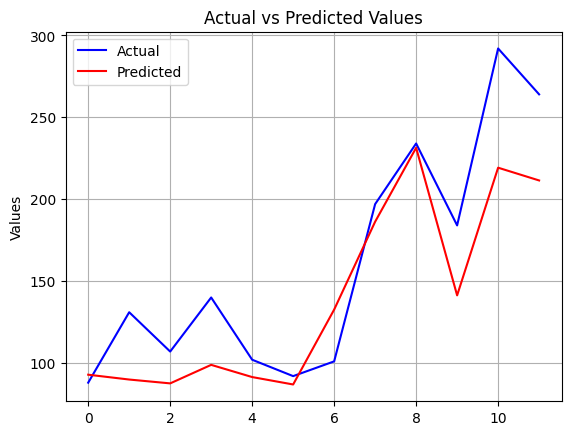

In [ ]:
plt.plot(y_test, color='blue', label='Actual')
plt.plot(gb_y_pred, color='red', label='Predicted')
plt.ylabel('Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)
rf_y_pred = rf_regressor.predict(X_test)
rf_mse = mean_absolute_percentage_error(y_test, rf_y_pred)*100
print("Random Forest Mean abs percent Error:", rf_mse)

Random Forest Mean abs percent Error: 18.95050111051191


In [ ]:
import xgboost as xgb

In [ ]:
xgb_regressor = xgb.XGBRegressor(objective ='reg:squarederror', random_state=42)
xgb_regressor.fit(X_train, y_train)
xgb_y_pred = xgb_regressor.predict(X_test)
xgb_mse = mean_absolute_percentage_error(y_test, xgb_y_pred)*100
print("XGBoost Mean abs percent Error:", xgb_mse)

XGBoost Mean abs percent Error: 21.296742771445174


For the direct ,  total customers time series fitting ,the gradient Boosting regression error metric (17.1) does better than SARIMAX (18.75) from the lectures